In [2]:
# Loading housing dataset
import pandas as pd


In [3]:
housing = pd.read_csv('housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


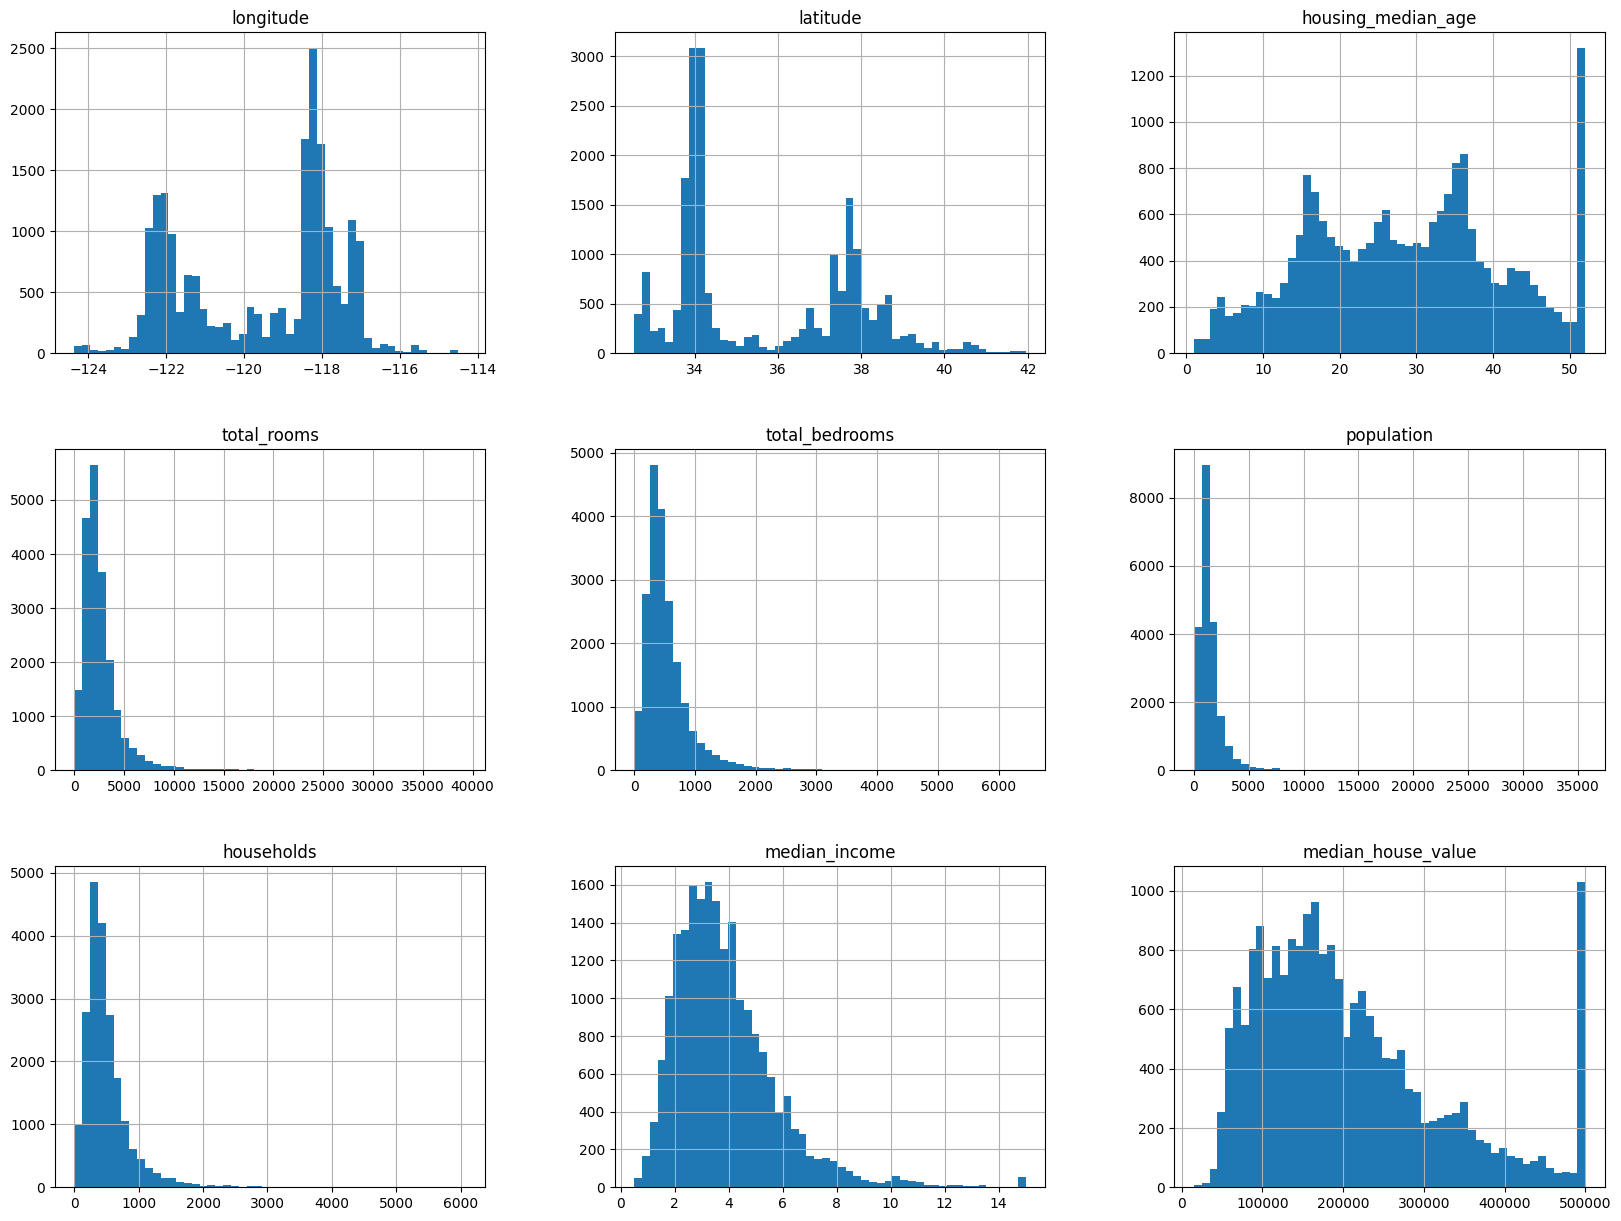

In [7]:
# visualize housing dataset
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Splitting our dataset into train and test

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=13)

In [9]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2973,-119.08,35.34,15.0,1474.0,235.0,768.0,238.0,4.1528,130100.0,INLAND
14432,-117.23,32.80,21.0,2429.0,579.0,1011.0,538.0,3.2250,229400.0,NEAR OCEAN
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND
18848,-122.37,41.41,28.0,1729.0,419.0,929.0,370.0,1.2700,53100.0,INLAND
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0,INLAND


In [10]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [11]:
# stratified sampling
import numpy as np

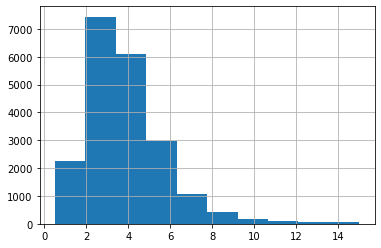

In [12]:
housing["median_income"].hist()

In [13]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [14]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

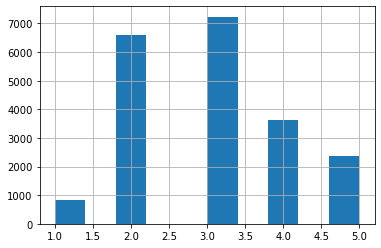

In [15]:
housing["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
len(strat_test_set)

4128

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [19]:
housing = strat_train_set.copy()

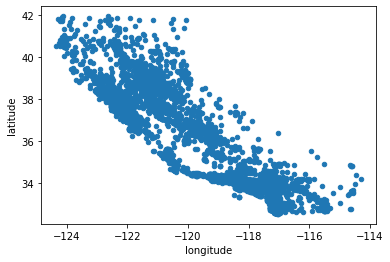

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

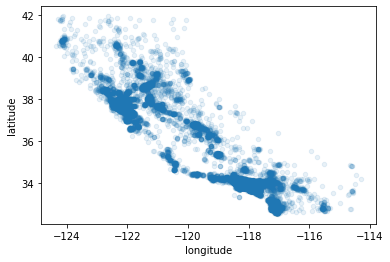

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

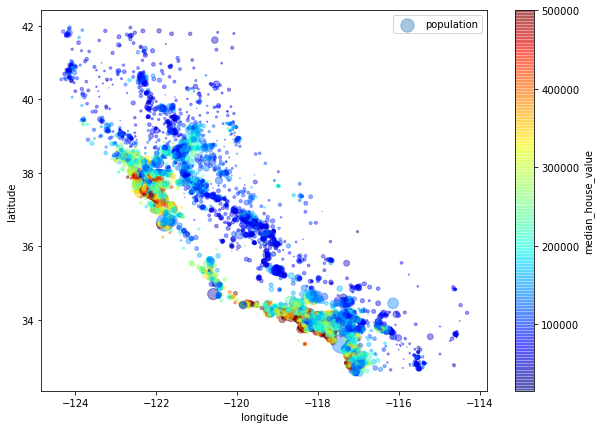

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689000
total_rooms           0.137326
housing_median_age    0.100730
households            0.069638
total_bedrooms        0.054213
population           -0.022837
longitude            -0.041520
latitude             -0.147386
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ED7B13520>,
      dtype=object)

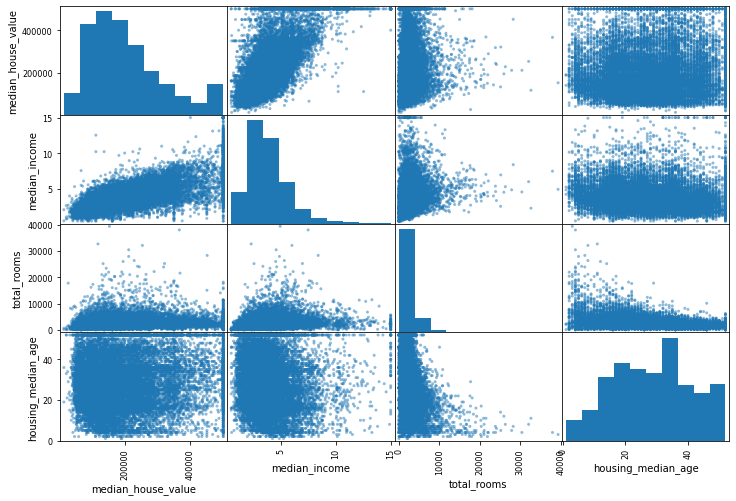

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

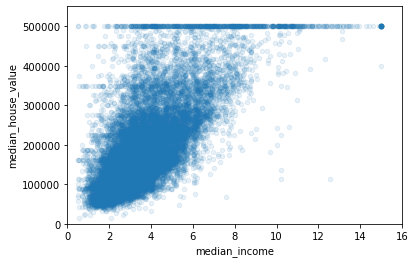

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [24]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689000
rooms_per_household         0.153984
total_rooms                 0.137326
housing_median_age          0.100730
households                  0.069638
total_bedrooms              0.054213
population_per_household   -0.022265
population                 -0.022837
longitude                  -0.041520
latitude                   -0.147386
bedrooms_per_room          -0.255736
Name: median_house_value, dtype: float64

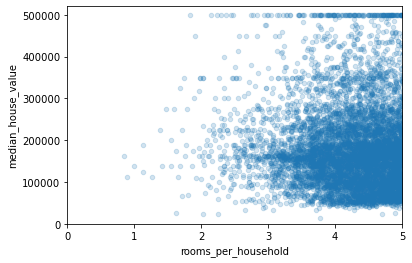

In [26]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the data for Machine Learning algorithms

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3328,-122.72,38.88,29.0,2781.0,NaN,890.0,310.0,1.9906,INLAND
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,NEAR OCEAN
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,<1H OCEAN
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN


In [29]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [30]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
3328,-122.72,38.88,29.0,2781.0,890.0,310.0,1.9906,INLAND
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,NEAR OCEAN
10389,-117.66,33.58,6.0,4186.0,1794.0,541.0,9.6986,<1H OCEAN
7668,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908,<1H OCEAN
11512,-118.10,33.74,32.0,2035.0,934.0,512.0,4.2287,NEAR OCEAN


In [31]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3328,-122.72,38.88,29.0,2781.0,433.0,890.0,310.0,1.9906,INLAND
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409,NEAR OCEAN
10389,-117.66,33.58,6.0,4186.0,433.0,1794.0,541.0,9.6986,<1H OCEAN
7668,-118.08,33.92,38.0,1335.0,433.0,1011.0,269.0,3.6908,<1H OCEAN
11512,-118.10,33.74,32.0,2035.0,433.0,934.0,512.0,4.2287,NEAR OCEAN


In [32]:
from sklearn.impute import SimpleImputer

In [33]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : number, string, np.nan (default) or None
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      should be set to `np.nan`, since `pd.NA` will be converted to `np.nan`.
 |  
 |  strategy : string, default='mean'
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using th

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [35]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  433.    , 1166.    ,
        408.    ,    3.5392])

Check that this is the same as manually computing the median of each attribute:

In [38]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  433.    , 1166.    ,
        408.    ,    3.5392])

Transform the training set:

In [39]:
X = imputer.transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [41]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3328,-122.72,38.88,29.0,2781.0,433.0,890.0,310.0,1.9906
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409
10389,-117.66,33.58,6.0,4186.0,433.0,1794.0,541.0,9.6986
7668,-118.08,33.92,38.0,1335.0,433.0,1011.0,269.0,3.6908
11512,-118.10,33.74,32.0,2035.0,433.0,934.0,512.0,4.2287


In [42]:
imputer.strategy

'median'

In [43]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.30,34.29,41.0,1445.0,410.0,1052.0,388.0,2.6333
1,-117.19,34.08,5.0,4458.0,751.0,2392.0,773.0,4.5938
2,-118.11,33.82,37.0,1756.0,345.0,836.0,335.0,4.3750
3,-119.73,34.42,25.0,2024.0,312.0,907.0,335.0,5.4127
4,-122.24,37.77,52.0,1153.0,235.0,481.0,223.0,2.6411


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [44]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
20224,NEAR OCEAN
13718,INLAND
8156,<1H OCEAN
17282,NEAR OCEAN
523,NEAR BAY
667,NEAR BAY
13911,INLAND
18996,INLAND
13126,INLAND
13394,INLAND


In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [0.],
       [4.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
housing_num_tr

array([[ 0.13400824, -0.62771257,  0.97561888, ..., -0.32479609,
        -0.28615036, -0.65109153],
       [ 1.1882931 , -0.7260148 , -1.88724577, ...,  0.85223861,
         0.72051307,  0.38193559],
       [ 0.72860491, -0.84772231,  0.65752281, ..., -0.51452705,
        -0.42473   ,  0.26664544],
       ...,
       [ 0.75358797, -0.77750644,  0.81657084, ..., -0.38101267,
        -0.49271246,  0.04860585],
       [-1.20008682,  0.74851858, -0.53533747, ..., -0.11486229,
         0.04853255,  0.38862748],
       [ 0.66364897, -0.77282538,  0.10085468, ..., -0.31601224,
        -0.69665986, -1.11652017]])

In [50]:
from sklearn.compose import ColumnTransformer

In [51]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
housing_prepared

array([[ 0.13400824, -0.62771257,  0.97561888, ..., -0.28615036,
        -0.65109153,  4.        ],
       [ 1.1882931 , -0.7260148 , -1.88724577, ...,  0.72051307,
         0.38193559,  1.        ],
       [ 0.72860491, -0.84772231,  0.65752281, ..., -0.42473   ,
         0.26664544,  0.        ],
       ...,
       [ 0.75358797, -0.77750644,  0.81657084, ..., -0.49271246,
         0.04860585,  0.        ],
       [-1.20008682,  0.74851858, -0.53533747, ...,  0.04853255,
         0.38862748,  0.        ],
       [ 0.66364897, -0.77282538,  0.10085468, ..., -0.69665986,
        -1.11652017,  0.        ]])

In [53]:
housing_prepared.shape

(16512, 9)

# Select and train a model 

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [220309.4577026  161034.76227092 251242.00863666 314905.10864253
 207815.99035736]


Compare against the actual values:

In [56]:
print("Labels:", list(some_labels))

Labels: [170800.0, 126500.0, 218200.0, 392800.0, 241000.0]


In [57]:
some_data_prepared

array([[ 0.13400824, -0.62771257,  0.97561888, -0.54120955, -0.29578534,
        -0.32479609, -0.28615036, -0.65109153,  4.        ],
       [ 1.1882931 , -0.7260148 , -1.88724577,  0.83911501,  0.51625685,
         0.85223861,  0.72051307,  0.38193559,  1.        ],
       [ 0.72860491, -0.84772231,  0.65752281, -0.3987333 , -0.45057344,
        -0.51452705, -0.42473   ,  0.26664544,  0.        ],
       [-0.08084602, -0.56685881, -0.29676541, -0.27595634, -0.52915817,
        -0.45216178, -0.42473   ,  0.81343057,  4.        ],
       [-1.3349953 ,  1.00129573,  1.85038308, -0.67498146, -0.71252253,
        -0.82635341, -0.71757754, -0.64698155,  3.        ]])

In [58]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69308.2248733966

In [59]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

50705.229931039736

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=13)

In [61]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0